In [2]:
#The decision boundary of each output neuron is linear, so perceptrons are
#incapable of learning complex patterns (just like logistic regression
#classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated 
#that this algorithm would converge to a solution.7
#This is called the perceptron convergence theorem.
#Scikit-Learn provides a Perceptron class that can be used pretty much as
#you would expect—for example, on the iris dataset (introduced in Chapter 4):

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron


iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) #Iris setosa
    

In [3]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [4]:
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred ## predicts True and False for these 2 flowers

array([ True, False])

In [5]:
# Contrary to logistic regression classifiers, perceptrons do not output a class probability. This is one 
#reason to prefer logistic regression over perceptrons. Moreover, perceptrons do not use any regularization
#by default, and training stops as soon as there are no more prediction errors on the training set, so the
#model typically does not generalize as well as logistic regression or a linear SVM classifier. However,
#perceptrons may train a bit faster.



#The Multilayer Perceptron and Backpropagation
#An MLP is composed of one input layer, one or more layers of TLUs called hidden layers, and one 
#final layer of TLUs called the output layer (see Figure 10-7). The layers close to the input layer
#are usually called the lower layers, and the ones close to the outputs are usually called the upper layers.



#The signal flows only in one direction (from the inputs to the outputs), so this architecture
#is an example of a feedforward neural network (FNN)


#When an ANN contains a deep stack of hidden layers,9 it is called a deep neural network (DNN). 
#The field of deep learning studies DNNs, and more generally it is interested in models containing
#deep stacks of computations

#Then, in 1970, a researcher named Seppo Linnainmaa introduced in his master’s thesis a technique to 
#compute all the gradients automatically and efficiently. This algorithm is now called reverse-mode 
#automatic differentiation (or reverse-mode autodiff for short). In just two passes through the network
#(one forward, one backward), it is able to compute the gradients of the neural network’s error with
#regard to every single model parameter. In other words, it can find out how each connection weight
#and each bias should be tweaked in order to reduce the neural network’s error. These gradients can
#then be used to perform a gradient descent step. If you repeat this process of computing the gradients
#automatically and taking a gradient descent step, the neural network’s error will gradually drop
#until it eventually reaches a minimum. This combination of reverse-mode autodiff and gradient 
#descent is now called backpropagation (or backprop for short).




#It is important to initialize all the hidden layers’ connection weights randomly, or else training will fail.
#For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be
#perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain
#identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had
#only one neuron per layer: it won’t be too smart. If instead you randomly initialize the weights, you 
#break the symmetry and allow backpropagation to train a diverse team of neurons.



#In short, backpropagation makes predictions for a mini-batch (forward pass), measures the error, 
#then goes through each layer in reverse to measure the error contribution from each parameter 
#(reverse pass), and finally tweaks the connection weights and biases to reduce the error (gradient descent step).




#In order for backprop to work properly, Rumelhart and his colleagues made a key change to the MLP’s 
#architecture: they replaced the step function with the logistic function, σ(z) = 1 / (1 + exp(–z)), 
#also called the sigmoid function. This was essential because the step function contains only flat 
#segments, so there is no gradient to work with (gradient descent cannot move on a flat surface),
#while the sigmoid function has a well-defined nonzero derivative everywhere, allowing gradient 
#descent to make some progress at every step. In fact, the backpropagation algorithm works well 
#with many other activation functions, not just the sigmoid function. Here are two other popular choices:


#These popular activation functions and their derivatives are represented in Figure 10-8. But wait!
#Why do we need activation functions in the first place? Well, if you chain several linear transformations, 
#all you get is a linear transformation. For example, if f(x) = 2x + 3 and g(x) = 5x – 1, then chaining 
#these two linear functions gives you another linear function: f(g(x)) = 2(5x – 1) + 3 = 10x + 1. So if 
#you don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a 
#single layer, and you can’t solve very complex problems with that. Conversely, a large enough DNN with
#nonlinear activations can theoretically approximate any continuous function.

In [6]:
#Regression MLPs
#First, MLPs can be used for regression tasks. If you want to predict a single value (e.g., the price of a house,
#given many of its features), then you just need a single output neuron: its output is the predicted value. For
#multivariate regression (i.e., to predict multiple values at once), you need one output neuron per output 
#dimension. For example, to locate the center of an object in an image, you need to predict 2D coordinates, 
#so you need two output neurons. If you also want to place a bounding box around the object, then you need
#two more numbers: the width and the height of the object. So, you end up with four output neurons.

#Scikit-Learn includes an MLPRegressor class, so let’s use it to build an MLP with three hidden layers composed 
#of 50 neurons each, and train it on the California housing dataset. For simplicity, we will use Scikit-Learn’s
#fetch_california_housing() function to load the data. This dataset is simpler than the one we used in Chapter 2, 
#since it contains only numerical features (there is no ocean_proximity feature), and there are no missing values.
#The following code starts by fetching and splitting the dataset, then it creates a pipeline to standardize the 
#input features before sending them to the MLPRegressor. This is very important for neural networks because they
#are trained using gradient descent, and as we saw in Chapter 4, gradient descent does not converge very well 
#when the features have very different scales. Finally, the code trains the model and evaluates its validation
#error. The model uses the ReLU activation function in the hidden layers, and it uses a variant of gradient 
#descent called Adam (see Chapter 11) to minimize the mean squared error, with a little bit of l2 regularization
#(which you can control via the alpha hyperparameter):


from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)


X_train, X_valid, y_train, y_valid = train_test_split(
            X_train_full, y_train_full, random_state=42)


mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [7]:
rmse

0.5053326657968719

In [8]:
#We get a validation RMSE of about 0.505, which is comparable to what you
#would get with a random forest classifier. Not too bad for a first try!
#Note that this MLP does not use any activation function for the output layer, so it’s free to output any 
#value it wants. This is generally fine, but if you want to guarantee that the output will always be positive,
#then you should use the ReLU activation function in the output layer, or the softplus activation function,
#which is a smooth variant of ReLU: softplus(z) = log(1 + exp(z)). Softplus is close to 0 when z is negative,
#and close to z when z is positive. Finally, if you want to guarantee that the predictions will always fall
#within a given range of values, then you should use the sigmoid function or the hyperbolic tangent, and scale 
#the targets to the appropriate range: 0 to 1 for sigmoid and –1 to 1 for tanh. Sadly, the MLPRegressor class 
#does not support activation functions in the output layer.


#Building and training a standard MLP with Scikit-Learn in just a few lines of code is very convenient, but 
#the neural net features are limited. This is why we will switch to Keras in the second part of this chapter.
        
        

In [9]:
#The MLPRegressor class uses the mean squared error, which is usually what you want for regression, but 
#if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. 
#Alternatively, you may want to use the Huber loss, which is a combination of both. It is quadratic when 
#the error is smaller than a threshold δ (typically 1) but linear when the error is larger than δ. The 
#linear part makes it less sensitive to outliers than the mean squared error, and the quadratic part allows 
#it to converge faster and be more precise than the mean absolute error. However, MLPRegressor only supports the MSE.

In [10]:
#Classification MLPs
#MLPs can also be used for classification tasks. For a binary classification problem, you just need a single 
#output neuron using the sigmoid activation function: the output will be a number between 0 and 1, which you 
#can interpret as the estimated probability of the positive class. The estimated probability of the negative 
#class is equal to one minus that number. MLPs can also easily handle multilabel binary classification tasks 
#(see Chapter 3). For example, you could have an email classification system that predicts whether each 
#incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. 
#In this case, you would need two output neurons, both using the sigmoid activation function: the first would 
#output the probability that the email is spam, and the second would output the probability that it is urgent.
#More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities
#do not necessarily add up to 1. This lets the model output any combination of labels: you can have nonurgent
#ham, urgent ham, nonurgent spam, and perhaps even urgent spam (although that would probably be an error).

#If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 
#through 9 for digit image classification), then you need to have one output neuron per class, and you should
#use the softmax activation function for the whole output layer (see Figure 10-9). The softmax function (introduced 
#in Chapter 4) will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1,
#since the classes are exclusive. As you saw in Chapter 3, this is called multiclass classification.


#Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss 
#(or x-entropy or log loss for short, see Chapter 4) is generally a good choice.


#Scikit-Learn has an MLPClassifier class in the sklearn.neural_network package. It is almost identical to 
#the MLPRegressor class, except that it minimizes the cross entropy rather than the MSE. Give it a try now,
#for example on the iris dataset. It’s almost a linear task, so a single layer with 5 to 10 neurons should 
#suffice (make sure to scale the features).



#Scikit-Learn has an MLPClassifier class in the sklearn.neural_network package. It is almost identical to the
#MLPRegressor class, except that it minimizes the cross entropy rather than the MSE. Give it a try now, for 
#example on the iris dataset. It’s almost a linear task, so a single layer with 5 to 10 neurons should suffice
#(make sure to scale the features).


#TIP
#Before we go on, I recommend you go through exercise 1 at the end of this chapter. You will play with 
#various neural network architectures and visualize their outputs using the TensorFlow playground. This will
#be very useful to better understand MLPs, including the effects of all the hyperparameters (number of layers 
#and neurons, activation functions, and more).

In [11]:
#Implementing MLPs with Keras
#Keras is TensorFlow’s high-level deep learning API: it allows you to build, train, 
#evaluate, and execute all sorts of neural networks. The original Keras library was 
#developed by François Chollet as part of a research project12 and was released as 
#a standalone open source project in March 2015. It quickly gained popularity, owing
#to its ease of use, flexibility, and beautiful design.



#Now let’s use Keras! We will start by building an MLP for image classification.
#Building an Image Classifier Using the Sequential API
#First, we need to load a dataset. We will use Fashion MNIST, which is a drop-in 
#replacement of MNIST (introduced in Chapter 3). It has the exact same format as 
#MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the 
#images represent fashion items rather than handwritten digits, so each class is 
#more diverse, and the problem turns out to be significantly more challenging than 
#MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST, but
#only about 83% on Fashion MNIST.



#Building an Image Classifier Using the Sequential API
#First, we need to load a dataset. We will use Fashion MNIST, which is a drop-in 
#replacement of MNIST (introduced in Chapter 3). It has the exact same format as
#MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the 
#images represent fashion items rather than handwritten digits, so each class is more
#diverse, and the problem turns out to be significantly more challenging than MNIST. 
#For example, a simple linear model reaches about 92% accuracy on MNIST, but only 
#about 83% on Fashion MNIST.


#Using Keras to load the dataset
#Keras provides some utility functions to fetch and load common datasets, including MNIST,
#Fashion MNIST, and a few more. Let’s load Fashion MNIST. It’s already shuffled and split
#into a training set (60,000 images) and a test set (10,000 images), but we’ll hold out 
#the last 5,000 images from the training set for validation:

import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

#TensorFlow is usually imported as tf, and the Keras API is available via tf.keras.

In [12]:
#When loading MNIST or Fashion MNIST using Keras rather than Scikit- Learn, one 
#important difference is that every image is represented as a 28 × 28 array rather than 
#a 1D array of size 784. Moreover, the pixel intensities are represented as integers 
#(from 0 to 255) rather than floats (from 0.0 to 255.0). Let’s take a look at the 
#shape and data type of the training set:

X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [13]:
#For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them
#by 255.0 (this also converts them to floats):

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [14]:
#With MNIST, when the label is equal to 5, it means that the image represents the 
#handwritten digit 5. Easy. For Fashion MNIST, however, we need the list of class 
#names to know what we are dealing with:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#For example, the first image in the training set represents an ankle boot:

class_names[y_train[0]]


'Ankle boot'

In [15]:
#Creating the model using the sequential API
#Now let’s build the neural network! Here is a classification MLP with two hidden layers:

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Metal device set to: Apple M1 Pro


2023-03-31 10:24:44.663223: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-31 10:24:44.663504: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
#Instead of adding the layers one by one as we just did, it’s often more convenient 
#to pass a list of layers when creating the Sequential model. You can also drop the 
#Input layer and instead specify the input_shape in the first layer:


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()


#The model’s summary() method displays all the model’s layers,14 including each layer’s 
#name (which is automatically generated unless you set it when creating the layer), 
#its output shape (None means the batch size can be anything), and its number of 
#parameters. The summary ends with the total number of parameters, including 
#trainable and non-trainable parameters. Here we only have trainable parameters 
#(you will see some non-trainable parameters later in this chapter):

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Note that Dense layers often have a lot of parameters. For example, the first hidden layer 
#has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters!
#This gives the model quite a lot of flexibility to fit the training data, but it also means
#that the model runs the risk of overfitting, especially when you do not have a lot of 
#training data. We will come back to this later.

#Each layer in a model must have a unique name (e.g., "dense_2"). You can set the layer 
#names explicitly using the constructor’s name argument, but generally it’s simpler to 
#let Keras name the layers automatically, as we just did. Keras takes the layer’s class
#name and converts it to snake case (e.g., a layer from the MyCoolLayer class is named 
#"my_cool_layer" by default). Keras also ensures that the name is globally unique, even 
#across models, by appending an index if needed, as in "dense_2". But why does it bother
#making the names unique across models? Well, this makes it possible to merge models 
#easily without getting name conflicts.

#You can easily get a model’s list of layers using the layers attribute, or use 
#the get_layer() method to access a layer by name:

model.layers

In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [19]:
model.get_layer('dense_12') is hidden1

ValueError: No such layer: dense_12. Existing layers are: ['flatten_1', 'dense_3', 'dense_4', 'dense_5'].

In [20]:
hidden1

In [21]:
#All the parameters of a layer can be accessed using its get_weights() and set_weights() 
#methods. For a Dense layer, this includes both the connection weights and the bias terms:

weights, biases = hidden1.get_weights()
weights

array([[ 0.00606299,  0.06024863, -0.04134121, ...,  0.01615225,
         0.04387075, -0.06343479],
       [-0.07429163, -0.03110987, -0.04809699, ...,  0.0559269 ,
         0.02748938, -0.04144006],
       [ 0.0055501 , -0.04907951, -0.06057887, ..., -0.03036299,
        -0.01647884,  0.05967766],
       ...,
       [-0.05988706,  0.06762692,  0.07248458, ..., -0.06857683,
         0.01020861,  0.00685229],
       [-0.04225935,  0.06826448, -0.02383086, ...,  0.04170898,
         0.05829886, -0.04404605],
       [-0.03183773,  0.0661739 , -0.0593466 , ..., -0.05865016,
         0.01461947, -0.04097207]], dtype=float32)

In [22]:
weights.shape, biases.shape

((784, 300), (300,))

In [23]:
#Notice that the Dense layer initialized the connection weights randomly (which is needed 
#to break symmetry, as discussed earlier), and the biases were initialized to zeros, which 
#is fine. If you want to use a different initialization method, you can set 
#kernel_initializer (kernel is another name for the matrix of connection weights) 
#or bias_initializer when creating the layer. We’ll discuss initializers further 
#in Chapter 11, and the full list is at https://keras.io/api/layers/initializers.

#Compiling the model
#After a model is created, you must call its compile() method to specify the loss 
#function and the optimizer to use. Optionally, you can specify a list of extra metrics
#to compute during training and evaluation:

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

#This code requires explanation. We use the "sparse_categorical_crossentropy" loss 
#because we have sparse labels (i.e., for each instance, there is just a target class
#index, from 0 to 9 in this case), and the classes are exclusive. If instead we had
#one target probability per class for each instance (such as one-hot vectors, e.g., 
#[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would 
#need to use the "categorical_crossentropy" loss instead. If we were doing binary 
#classification or multilabel binary classification, then we would use the "sigmoid"
#activation function in the output layer instead of the "softmax" activation function,
#and we would use the "binary_crossentropy" loss.


#Regarding the optimizer, "sgd" means that we will train the model using stochastic 
#gradient descent. In other words, Keras will perform the backpropagation algorithm 
#described earlier (i.e., reverse-mode autodiff plus gradient descent). We will discuss
#more efficient optimizers in Chapter 11. They improve gradient descent, not autodiff.

#NOTE
#When using the SGD optimizer, it is important to tune the learning rate. So, you 
#will generally want to use optimizer=tf.keras. optimizers.SGD(learning_rate=__???__)
#to set the learning rate, rather than optimizer="sgd", which defaults to a learning 
#rate of 0.01


#Finally, since this is a classifier, it’s useful to measure its accuracy during 
#training and evaluation, which is why we set metrics=["accuracy"].

In [24]:
#Training and evaluating the model
#Now the model is ready to be trained. For this we simply need to call its fit() method:

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-03-31 10:24:57.030473: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-31 10:24:57.150957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7224 - accuracy: 0.7612

2023-03-31 10:25:05.030723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 9s 5ms/step - loss: 0.7224 - accuracy: 0.7612 - val_loss: 0.5098 - val_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4879 - accuracy: 0.8297 - val_loss: 0.4657 - val_accuracy: 0.8332
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4413 - accuracy: 0.8447 - val_loss: 0.4239 - val_accuracy: 0.8502
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4158 - accuracy: 0.8549 - val_loss: 0.3979 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3952 - accuracy: 0.8608 - val_loss: 0.3918 - val_accuracy: 0.8598
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3788 - accuracy: 0.8664 - val_loss: 0.4004 - val_accuracy: 0.8628
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3662 - accuracy: 0.8704 - val_loss: 0.3736 - val_accuracy: 0.8666
Epo

In [25]:
#We pass it the input features (X_train) and the target classes (y_train), as well as 
#the number of epochs to train (or else it would default to just 1, which would definitely
#not be enough to converge to a good solution). We also pass a validation set (this is 
#optional). Keras will measure the loss and the extra metrics on this set at the end of
#each epoch, which is very useful to see how well the model really performs. If the 
#performance on the training set is much better than on the validation set, your model
#is probably overfitting the training set, or there is a bug, such as a data mismatch 
#between the training set and the validation set.

#And that’s it! The neural network is trained. At each epoch during training, Keras 
#displays the number of mini-batches processed so far on the left side of the progress
#bar. The batch size is 32 by default, and since the training set has 55,000 images, 
#the model goes through 1,719 batches per epoch: 1,718 of size 32, and 1 of size 24.
#After the progress bar, you can see the mean training time per sample, and the 
#loss and accuracy (or any other extra metrics you asked for) on both the training 
#set and the validation set. Notice that the training loss went down, which is a good 
#sign, and the validation accuracy reached 88.94% after 30 epochs. That’s slightly 
#below the training accuracy, so there is a little bit of overfitting going on, but
#not a huge amount.


#Instead of passing a validation set using the validation_data argument, you could 
#set validation_split to the ratio of the training set that you want Keras to use for 
#validation. For example, validation_split=0.1 tells Keras to use the last 10% of the data
#(before shuffling) for validation.



#If the training set was very skewed, with some classes being 
#overrepresented and others underrepresented, it would be useful to set
#the class_weight argument when calling the fit() method, to give a 
#larger weight to underrepresented classes and a lower weight to
#overrepresented classes. These weights would be used by Keras when 
#computing the loss. If you need per-instance weights, set the 
#sample_weight argument. If both class_weight and sample_weight are
#provided, then Keras multiplies them. Per-instance weights could be
#useful, for example, if some instances were labeled by experts while 
#others were labeled using a crowdsourcing platform: you might want 
#to give more weight to the former. You can also provide sample weights 
#(but not class weights) for the validation set by adding them as a 
#third item in the validation_data tuple.


#The fit() method returns a History object containing the training 
#parameters (history.params), the list of epochs it went through 
#(history.epoch), and most importantly a dictionary (history.history) 
#containing the loss and extra metrics it measured at the end of each
#epoch on the training set and on the validation set (if any). If you
#use this dictionary to create a Pandas DataFrame and call its plot()
#method, you get the learning curves shown in Figure 10-11:

import matplotlib.pyplot as plt
import pandas as pd

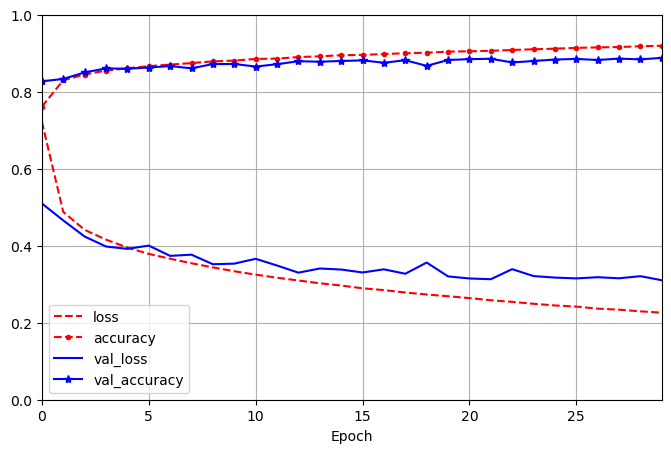

In [26]:
pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0, 29], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [27]:
#You can see that both the training accuracy and the validation 
#accuracy steadily increase during training, while the training
#loss and the validation loss decrease. This is good. The validation 
#curves are relatively close to each other at first, but they get
#further apart over time, which shows that there’s a little bit of 
#overfitting. In this particular case, the model looks like it
#performed better on the validation set than on the training set
#at the beginning of training, but that’s not actually the case.
#The validation error is computed at the end of each epoch, while
#the training error is computed using a running mean during each 
#epoch, so the training curve should be shifted by half an epoch 
#to the left. If you do that, you will see that the training and 
#validation curves overlap almost perfectly at the beginning of training.


#The training set performance ends up beating the validation performance,
#as is generally the case when you train for long enough. You can tell
#that the model has not quite converged yet, as the validation loss is
#still going down, so you should probably continue training. This is 
#as simple as calling the fit() method again, since Keras just continues 
#training where it left off: you should be able to reach about 89.8% 
#validation accuracy, while the training accuracy will continue to rise
#up to 100% (this is not always the case).


#If you are not satisfied with the performance of your model, you 
#should go back and tune the hyperparameters. The first one to check 
#is the learning rate. If that doesn’t help, try another optimizer 
#(and always retune the learning rate after changing any hyperparameter).
#If the performance is still not great, then try tuning model 
#hyperparameters such as the number of layers, the number of neurons per 
#layer, and the types of activation functions to use for each hidden 
#layer. You can also try tuning other hyperparameters, such as the 
#batch size (it can be set in the fit() method using the batch_size
#argument, which defaults to 32). We will get back to hyperparameter
#tuning at the end of this chapter. Once you are satisfied with your 
#model’s validation accuracy, you should evaluate it on the test set
#to estimate the generalization error before you deploy the model to
#production. You can easily do this using the evaluate() method (it
#also supports several other arguments, such as batch_size and 
#sample_weight; please check the documentation for more details):

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3245 - accuracy: 0.8841


[0.32452696561813354, 0.8841000199317932]

In [28]:
#As you saw in Chapter 2, it is common to get slightly lower performance
#on the test set than on the validation set, because the hyperparameters
#are tuned on the validation set, not the test set (however, in this 
#example, we did not do any hyperparameter tuning, so the lower 
#accuracy is just bad luck). Remember to resist the temptation to 
#tweak the hyperparameters on the test set, or else your estimate 
#of the generalization error will be too optimistic.

In [29]:
#Using the model to make predictions
#Now let’s use the model’s predict() method to make predictions on new 
#instances. Since we don’t have actual new instances, we’ll just use 
#the first three instances of the test set:

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 58ms/step


2023-03-31 10:29:22.203535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
#For each instance the model estimates one probability per class, 
#from class 0 to class 9. This is similar to the output of the 
#predict_proba() method in Scikit-Learn classifiers. For example, for the first 
#image it estimates that the probability of class 9 (ankle boot) is 96%, 
#the probability of class 7 (sneaker) is 2%, the probability of class 5 (sandal)
#is 1%, and the probabilities of the other classes are negligible. In other words,
#it is highly confident that the first image is footwear, most likely ankle boots
#but possibly sneakers or sandals. If you only care about the class with the
#highest estimated probability (even if that probability is quite low), then
#you can use the argmax() method to get the highest probability class index 
#for each instance:

import numpy as np

y_pred = y_proba.argmax(axis=-1) #-1 returns same as axis=1 because the last axis *IS* axis=1
y_pred


array([9, 2, 1])

In [31]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [32]:
np.array(class_names[y_pred])

#explanation of error:
#Perhaps the error message is somewhat misleading, but the gist 
#is that class_names is a list, not a numpy array. You cannot use array 
#indexing on it. Make it an array first with np.array()

TypeError: only integer scalar arrays can be converted to a scalar index

In [33]:
type(class_names)

list

In [34]:
#Here, the classifier actually classified all three images 
#correctly (these images are shown in Figure 10-12):

y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [35]:
#Now you know how to use the sequential API to build, train, and 
#evaluate a classification MLP. But what about regression?

#Building a Regression MLP Using the Sequential API

#Let’s switch back to the California housing problem and tackle it 
#using the same MLP as earlier, with 3 hidden layers composed of 50 
#neurons each, but this time building it with Keras.

#Using the sequential API to build, train, evaluate, and use a 
#regression MLP is quite similar to what we did for classification. 
#The main differences in the following code example are the fact that
#the output layer has a single neuron (since we only want to predict a
#single value) and it uses no activation function, the loss function
#is the mean squared error, the metric is the RMSE, and we’re using an
#Adam optimizer like Scikit-Learn’s MLPRegressor did. Moreover, in this
#example we don’t need a Flatten layer, and instead we’re using a 
#Normalization layer as the first layer: it does the same thing as
#Scikit-Learn’s StandardScaler, but it must be fitted to the training
#data using its adapt() method before you call the model’s fit() method.
#(Keras has other preprocessing layers, which will be covered in 
#Chapter 13). Let’s take a look:


housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)


X_train, X_valid, y_train, y_valid = train_test_split(
            X_train_full, y_train_full, random_state=42)

tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=
             ["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))

2023-03-31 10:29:29.407188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
 11/363 [..............................] - ETA: 1s - loss: 4.8937 - root_mean_squared_error: 2.2122  

2023-03-31 10:29:30.176358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 0.9042 - root_mean_squared_error: 0.9509

2023-03-31 10:29:32.208758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 3s 6ms/step - loss: 0.9042 - root_mean_squared_error: 0.9509 - val_loss: 0.3798 - val_root_mean_squared_error: 0.6163
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3769 - root_mean_squared_error: 0.6139 - val_loss: 1.6157 - val_root_mean_squared_error: 1.2711
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3605 - root_mean_squared_error: 0.6004 - val_loss: 0.4478 - val_root_mean_squared_error: 0.6692
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3415 - root_mean_squared_error: 0.5844 - val_loss: 1.3377 - val_root_mean_squared_error: 1.1566
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3340 - root_mean_squared_error: 0.5780 - val_loss: 1.2113 - val_root_mean_squared_error: 1.1006
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3270 - root_mean_squared_error: 0.5718 - val_loss: 0.3213 - val_root_mean_s

In [36]:
X_train.shape[1:]

(8,)

In [37]:
X_train.shape

(11610, 8)

In [38]:
11610 / 32 #there are ~363 batches per epoch, each having 32 instances - this is default batch size

362.8125

In [39]:
mse_test, rmse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.2841 - root_mean_squared_error: 0.5330


In [40]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 39ms/step


2023-03-31 10:30:48.730994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[0.48932123],
       [1.1363262 ],
       [5.086301  ]], dtype=float32)

In [41]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [42]:
#As you can see, the sequential API is quite clean and straightforward.
#However, although Sequential models are extremely common, it is 
#sometimes useful to build neural networks with more complex topologies,
#or with multiple inputs or outputs. For this purpose, Keras offers the 
#functional API.


#Building Complex Models Using the Functional API

#One example of a nonsequential neural network is a Wide & Deep neural
#network. This neural network architecture was introduced in a 2016
#paper by Heng-Tze Cheng et al.15 It connects all or part of the inputs
#directly to the output layer, as shown in Figure 10-13. This 
#architecture makes it possible for the neural network to learn both
#deep patterns (using the deep path) and simple rules (through the 
#short path).16 

#In contrast, a regular MLP forces all the data to 
#flow through the full stack of layers; thus, simple patterns in the 
#data may end up being distorted by this sequence of transformations.


#Let’s build such a neural network to tackle the California housing problem:


normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

#At a high level, the first five lines create all the layers we need to build the model, the 
#next six lines use these layers just like functions to go from the input to the output, and 
#the last line creates a Keras Model object by pointing to the input and the output. Let’s go
#through this code in more detail:


#First, we create five layers: a Normalization layer to standardize the inputs, two Dense layers with 
#30 neurons each, using the ReLU activation function, a Concatenate layer, and one more Dense layer 
#with a single neuron for the output layer, without any activation function.


#Next, we create an Input object (the variable name input_ is used to avoid overshadowing Python’s 
#built-in input() function). This is a specification of the kind of input the model will get, including
#its shape and optionally its dtype, which defaults to 32-bit floats. A model may actually have multiple
#inputs, as you will see shortly.



#Then we use the Normalization layer just like a function, passing it the Input object. This is why 
#this is called the functional API. Note that we are just telling Keras how it should connect the 
#layers together; no actual data is being processed yet, as the Input object is just a data specification.
#In other words, it’s a symbolic input. The output of this call is also symbolic: normalized doesn’t store
#any actual data, it’s just used to construct the model.


#In the same way, we then pass normalized to hidden_layer1, which outputs hidden1, and we pass hidden1 to
#hidden_layer2, which outputs hidden2.


#So far we’ve connected the layers sequentially, but then we use the concat_layer to concatenate the input 
#and the second hidden layer’s output. Again, no actual data is concatenated yet: it’s all symbolic, to 
#build the model.


#Then we pass concat to the output_layer, which gives us the final output.

#Lastly, we create a Keras Model, specifying which inputs and outputs to use.


In [43]:
#Once you have built this Keras model, everything is exactly like earlier, so there’s no need to
#repeat it here: you compile the model, adapt the Normalization layer, fit the model, evaluate it, and
#use it to make predictions.

#But what if you want to send a subset of the features through the wide path and a different subset 
#(possibly overlapping) through the deep path, as illustrated in Figure 10-14? In this case, one 
#solution is to use multiple inputs. For example, suppose we want to send five features through 
#the wide path (features 0 to 4), and six features through the deep path (features 2 to 7). We 
#can do this as follows:


input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])


#There are a few things to note in this example, compared to the previous one:

#Each Dense layer is created and called on the same line. This is a common practice, as it
#makes the code more concise without losing clarity. However, we can’t do this with the 
#Normalization layer since we need a reference to the layer to be able to call its adapt()
#method before fitting the model.

#We used tf.keras.layers.concatenate(), which creates a Concatenate layer and calls it with the given inputs.

#We specified inputs=[input_wide, input_deep] when creating the model, since there are two inputs.


In [44]:
#Now we can compile the model as usual, but when we call the fit() method, instead of passing a single
#input matrix X_train, we must pass a pair of matrices (X_train_wide, X_train_deep), one per input. The
#same is true for X_valid, and also for X_test and X_new when you call evaluate() or predict():


optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                   validation_data=((X_valid_wide, X_valid_deep), y_valid))

2023-03-31 10:31:00.005803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-31 10:31:00.675136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
 21/363 [>.............................] - ETA: 1s - loss: 4.9541 - root_mean_squared_error: 2.2258 

2023-03-31 10:31:01.439300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


361/363 [============================>.] - ETA: 0s - loss: 1.3297 - root_mean_squared_error: 1.1531

2023-03-31 10:31:03.407442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 6ms/step - loss: 1.3260 - root_mean_squared_error: 1.1515 - val_loss: 0.8780 - val_root_mean_squared_error: 0.9370
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4709 - root_mean_squared_error: 0.6862 - val_loss: 0.5435 - val_root_mean_squared_error: 0.7373
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4168 - root_mean_squared_error: 0.6456 - val_loss: 0.4754 - val_root_mean_squared_error: 0.6895
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3985 - root_mean_squared_error: 0.6312 - val_loss: 0.3651 - val_root_mean_squared_error: 0.6042
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3835 - root_mean_squared_error: 0.6193 - val_loss: 0.3442 - val_root_mean_squared_error: 0.5867
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3679 - root_mean_squared_error: 0.6065 - val_loss: 0.3664 - val_root_mean_s

In [45]:
#TIP
#Instead of passing a tuple (X_train_wide, X_train_deep), you can pass a dictionary 
#{"input_wide": X_train_wide, "input_deep": X_train_deep}, if you set name="input_wide" and name="input_deep" when
#creating the inputs. This is highly recommended when there are many inputs, to clarify the code and avoid 
#getting the order wrong.

#There are also many use cases in which you may want to have multiple outputs:


#The task may demand it. For instance, you may want to locate and classify the main object in a picture. 
#This is both a regression tasks and a classification task.

#Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural 
#network per task, but in many cases you will get better results on all tasks by training a single neural 
#network with one output per task. This is because the neural network can learn features in the data that 
#are useful across tasks. For example, you could perform multitask classification on pictures of faces, 
#using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output
#to identify whether they are wearing glasses or not.

#Another use case is as a regularization technique (i.e., a training constraint whose objective is to 
#reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add
#an auxiliary output in a neural network architecture (see Figure 10-15) to ensure that the underlying part
#of the network learns something useful on its own, without relying on the rest of the network.




In [46]:
[...] # Same as above, up to the main output layer output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                          outputs=[output, aux_output])


#Each output will need its own loss function. Therefore, when we compile the model, we should pass a list 
#of losses. If we pass a single loss, Keras will assume that the same loss must be used for all outputs. 
#By default, Keras will compute all the losses and simply add them up to get the final loss used for 
#training. Since we care much more about the main output than about the auxiliary output (as it is just 
#used for regularization), we want to give the main output’s loss a much greater weight. Luckily, it is 
#possible to set all the loss weights when compiling the model:

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1),
             optimizer=optimizer, metrics=["RootMeanSquaredError"])

#TIP:
#Instead of passing a tuple loss=("mse", "mse"), you can pass a dictionary loss= {"output": "mse",
#"aux_output": "mse"}, assuming you created the output layers with name="output" and name="aux_output".
#Just like for the inputs, this clarifies the code and avoids errors when there are several outputs. You
#can also pass a dictionary for loss_weights.


#Now when we train the model, we need to provide labels for each output. In this example, 
#the main output and the auxiliary output should try to predict the same thing, so they should
#use the same labels. So instead of passing y_train, we need to pass (y_train, y_train), or a 
#dictionary {"output": y_train, "aux_output": y_train} if the outputs were named "output" and "aux_output".
#The same goes for y_valid and y_test:


norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit(
        (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
        validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
  7/363 [..............................] - ETA: 2s - loss: 1.0591 - dense_15_loss: 0.3485 - dense_16_loss: 7.4541 - dense_15_root_mean_squared_error: 0.5904 - dense_16_root_mean_squared_error: 2.7302  

2023-03-31 10:32:36.226693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 0.4878 - dense_15_loss: 0.3339 - dense_16_loss: 1.8732 - dense_15_root_mean_squared_error: 0.5779 - dense_16_root_mean_squared_error: 1.3687

2023-03-31 10:32:39.154398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 4s 9ms/step - loss: 0.4878 - dense_15_loss: 0.3339 - dense_16_loss: 1.8732 - dense_15_root_mean_squared_error: 0.5779 - dense_16_root_mean_squared_error: 1.3687 - val_loss: 0.7339 - val_dense_15_loss: 0.3721 - val_dense_16_loss: 3.9907 - val_dense_15_root_mean_squared_error: 0.6100 - val_dense_16_root_mean_squared_error: 1.9977
Epoch 2/20
363/363 [==============================] - 3s 9ms/step - loss: 0.3793 - dense_15_loss: 0.3308 - dense_16_loss: 0.8162 - dense_15_root_mean_squared_error: 0.5752 - dense_16_root_mean_squared_error: 0.9034 - val_loss: 0.5624 - val_dense_15_loss: 0.3518 - val_dense_16_loss: 2.4572 - val_dense_15_root_mean_squared_error: 0.5932 - val_dense_16_root_mean_squared_error: 1.5675
Epoch 3/20
363/363 [==============================] - 3s 9ms/step - loss: 0.3568 - dense_15_loss: 0.3249 - dense_16_loss: 0.6442 - dense_15_root_mean_squared_error: 0.5700 - dense_16_root_mean_squared_error: 0.8026 - val_loss: 0.4363 - val_den

In [47]:
#When we evaluate the model, Keras returns the weighted sum of the losses, as well as all the 
#individual losses and metrics:

eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results


print(weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse)

162/162 [==============================] - 1s 6ms/step - loss: 0.3120 - dense_15_loss: 0.3064 - dense_16_loss: 0.3620 - dense_15_root_mean_squared_error: 0.5535 - dense_16_root_mean_squared_error: 0.6017
0.3119716942310333 0.30641406774520874 0.36198946833610535 0.5535468459129333 0.6016556024551392


In [48]:
#Similarly, the predict() method will return predictions for each output:

y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 48ms/step


2023-03-31 10:33:54.125010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [49]:
#The predict() method returns a tuple, and it does not have a return_dict argument to get a dictionary instead.
#However, you can create one using model.output_names:

y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 [==============================] - 0s 15ms/step


{'dense_15': array([[0.3386169],
        [1.1068047],
        [3.5085928]], dtype=float32),
 'dense_16': array([[0.58676076],
        [0.9867044 ],
        [3.2857347 ]], dtype=float32)}

In [50]:
#Saving and Restoring a Model
#Saving a trained Keras model is as simple as it gets:

model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


In [51]:
#When you set save_format="tf",18 Keras saves the model using 
#TensorFlow’s SavedModel format: this is a directory (with the 
#given name) containing several files and subdirectories. In 
#particular, the saved_model.pb file contains the model’s 
#architecture and logic in the form of a serialized computation 
#graph, so you don’t need to deploy the model’s source code in 
#order to use it in production; the SavedModel is sufficient 
#(you will see how this works in Chapter 12). The keras_metadata.pb 
#file contains extra information needed by Keras. The variables 
#subdirectory contains all the parameter values (including the 
#connection weights, the biases, the normalization statistics, 
#and the optimizer’s parameters), possibly split across multiple
#files if the model is very large. Lastly, the assets directory
#may contain extra files, such as data samples, feature names,
#class names, and so on. By default, the assets directory is empty.
#Since the optimizer is also saved, including its hyperparameters
#and any state it may have, after loading the model you can continue
#training if you want.

In [52]:
#You will typically have a script that trains a model and saves it,
#and one or more scripts (or web services) that load the model and use
#it to evaluate it or to make predictions. Loading the model is just as
#easy as saving it:

model = tf.keras.models.load_model("my_keras_model/")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
y_pred_main, y_pred_aux

1/1 [==============================] - 0s 41ms/step


2023-03-31 10:33:58.749083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


(array([[0.3386169],
        [1.1068047],
        [3.5085928]], dtype=float32),
 array([[0.58676076],
        [0.9867044 ],
        [3.2857347 ]], dtype=float32))

In [53]:
#You can also use save_weights() and load_weights() to save and load
#only the parameter values. This includes the connection weights, biases,
#preprocessing stats, optimizer state, etc. The parameter values are
#saved in one or more files such as my_weights.data-00004-of-00052, 
#plus an index file like my_weights.index.
#Saving just the weights is faster and uses less disk space than 
#saving the whole model, so it’s perfect to save quick checkpoints
#during training. If you’re training a big model, and it takes hours 
#or days, then you must save checkpoints regularly in case the computer
#crashes. But how can you tell the fit() method to save checkpoints?
#Use callbacks.

In [54]:
#Using Callbacks
#The fit() method accepts a callbacks argument that lets you specify 
#a list of objects that Keras will call before and after training, 
#before and after each epoch, and even before and after processing 
#each batch. For example, the ModelCheckpoint callback saves 
#checkpoints of your model at regular intervals during training, 
#by default at the end of each epoch:

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                  save_weights_only=True)
history = model.fit([...], callbacks=[checkpoint_cb])

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'ellipsis'>"}), <class 'NoneType'>

In [55]:
#Moreover, if you use a validation set during training, you can set 
#save_ best_only=True when creating the ModelCheckpoint. In this case, 
#it will only save your model when its performance on the validation set
#is the best so far. This way, you do not need to worry about training
#for too long and overfitting the training set: simply restore the last
#saved model after training, and this will be the best model on the
#validation set. This is one way to implement early stopping (introduced
#in Chapter 4), but it won’t actually stop training.


#Another way is to use the EarlyStopping callback. It will interrupt 
#training when it measures no progress on the validation set for a 
#number of epochs (defined by the patience argument), and if you set
#restore_best_weights=True it will roll back to the best model at the
#end of training. You can combine both callbacks to save checkpoints 
#of your model in case your computer crashes, and interrupt training 
#early when there is no more progress, to avoid wasting time and 
#resources and to reduce overfitting:



early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                    restore_best_weights=True)

history = model.fit([...], callbacks=[checkpoint_cb, early_stopping_cb])


#The number of epochs can be set to a large value since training will
#stop automatically when there is no more progress (just make sure the
#learning rate is not too small, or else it might keep making slow
#progress until the end). The EarlyStopping callback will store the
#weights of the best model in RAM, and it will restore them for you
#at the end of training.

#Now let’s take a look at one more tool you should definitely 
#have in your toolbox when using Keras: TensorBoard.

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'ellipsis'>"}), <class 'NoneType'>

In [83]:
#Using TensorBoard for Visualization
#TensorBoard is a great interactive visualization tool that you can use
#to view the learning curves during training, compare curves and metrics
#between multiple runs, visualize the computation graph, analyze training
#statistics, view images generated by your model, visualize complex 
#multidimensional data projected down to 3D and automatically clustered
#for you, profile your network (i.e., measure its speed to identify 
#bottlenecks), and more!

#To use TensorBoard, you must modify your program so that it outputs
#the data you want to visualize to special binary logfiles called event 
#files. Each binary data record is called a summary. The TensorBoard 
#server will monitor the log directory, and it will automatically pick
#up the changes and update the visualizations: this allows you to 
#visualize live data (with a short delay), such as the learning 
#curves during training. In general, you want to point the TensorBoard
#server to a root log directory and configure your program so that
#it writes to a different subdirectory every time it runs. This way, 
#the same TensorBoard server instance will allow you to visualize and
#compare data from multiple runs of your program, without getting 
#everything mixed up.

#Let’s name the root log directory my_logs, and let’s define a little
#function that generates the path of the log subdirectory based on the
#current date and time, so that it’s different at every run:

from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir = "my_logs"):
   return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")



In [84]:
strftime("run_%Y_%m_%d_%H_%M_%S")

'run_2023_03_31_14_17_11'

In [85]:
run_logdir = get_run_logdir()
run_logdir

PosixPath('my_logs/run_2023_03_31_14_17_11')

In [86]:
#The good news is that Keras provides a convenient TensorBoard() 
#callback that will take care of creating the log directory for you 
#(along with its parent directories if needed), and it will create 
#event files and write summaries to them during training. It will 
#measure your model’s training and validation loss and metrics 
#(in this case, the MSE and RMSE), and it will also profile your 
#neural network. It is straightforward to use:


tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                               profile_batch=(100, 200))
history = model.fit(
        (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
        validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[tensorboard_cb]
)

Epoch 1/20


2023-03-31 14:17:12.590616: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-31 14:17:12.590666: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-03-31 14:17:12.591750: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-03-31 14:17:12.696908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


124/363 [=========>....................] - ETA: 1s - loss: 0.6141 - dense_15_loss: 0.2883 - dense_16_loss: 0.3259 - dense_15_root_mean_squared_error: 0.5369 - dense_16_root_mean_squared_error: 0.5708

2023-03-31 14:17:13.836309: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-31 14:17:13.836325: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


213/363 [================>.............] - ETA: 2s - loss: 0.6099 - dense_15_loss: 0.2863 - dense_16_loss: 0.3237 - dense_15_root_mean_squared_error: 0.5350 - dense_16_root_mean_squared_error: 0.5689

2023-03-31 14:17:16.707912: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-03-31 14:17:16.726048: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-03-31 14:17:16.737340: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2023_03_31_14_17_11/plugins/profile/2023_03_31_14_17_16

2023-03-31 14:17:16.749543: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to my_logs/run_2023_03_31_14_17_11/plugins/profile/2023_03_31_14_17_16/Rokos-MacBook-Pro-2.local.trace.json.gz
2023-03-31 14:17:16.771260: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2023_03_31_14_17_11/plugins/profile/2023_03_31_14_17_16

2023-03-31 14:17:16.773693: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to my_logs/run_2023_03_31_14_17_11/plug

363/363 [==============================] - ETA: 0s - loss: 0.6245 - dense_15_loss: 0.2890 - dense_16_loss: 0.3355 - dense_15_root_mean_squared_error: 0.5376 - dense_16_root_mean_squared_error: 0.5792

2023-03-31 14:17:18.140419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 6s 16ms/step - loss: 0.6245 - dense_15_loss: 0.2890 - dense_16_loss: 0.3355 - dense_15_root_mean_squared_error: 0.5376 - dense_16_root_mean_squared_error: 0.5792 - val_loss: 2.4284 - val_dense_15_loss: 0.7678 - val_dense_16_loss: 1.6606 - val_dense_15_root_mean_squared_error: 0.8762 - val_dense_16_root_mean_squared_error: 1.2886
Epoch 2/20
363/363 [==============================] - 3s 9ms/step - loss: 0.6263 - dense_15_loss: 0.2911 - dense_16_loss: 0.3351 - dense_15_root_mean_squared_error: 0.5396 - dense_16_root_mean_squared_error: 0.5789 - val_loss: 1.2400 - val_dense_15_loss: 0.3405 - val_dense_16_loss: 0.8995 - val_dense_15_root_mean_squared_error: 0.5835 - val_dense_16_root_mean_squared_error: 0.9484
Epoch 3/20
363/363 [==============================] - 3s 9ms/step - loss: 0.6114 - dense_15_loss: 0.2860 - dense_16_loss: 0.3254 - dense_15_root_mean_squared_error: 0.5347 - dense_16_root_mean_squared_error: 0.5705 - val_loss: 0.6442 - val_de

In [87]:
#That’s all there is to it! In this example, it will profile the network
#between batches 100 and 200 during the first epoch. Why 100 and 200?
#Well, it often takes a few batches for the neural network to “warm up”,
#so you don’t want to profile too early, and profiling uses resources,
#so it’s best not to do it for every batch.

#Next, try changing the learning rate from 0.001 to 0.002, and run the 
#code again, with a new log subdirectory. You will end up with a 
#directory structure similar to this one:


optimizer = tf.keras.optimizers.Adam(learning_rate=2e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=
             ["RootMeanSquaredError"])

run_logdir = get_run_logdir() #need to re-run this function for each run
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                               profile_batch=(100, 200))

history = model.fit(
        (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
        validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[tensorboard_cb]
)

Epoch 1/20


2023-03-31 14:19:15.653003: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-31 14:19:15.653013: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-03-31 14:19:15.653074: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-03-31 14:19:15.874028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


126/363 [=========>....................] - ETA: 1s - loss: 0.5929 - dense_15_loss: 0.2784 - dense_16_loss: 0.3145 - dense_15_root_mean_squared_error: 0.5276 - dense_16_root_mean_squared_error: 0.5608

2023-03-31 14:19:16.872771: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-31 14:19:16.872783: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


214/363 [================>.............] - ETA: 1s - loss: 0.5914 - dense_15_loss: 0.2779 - dense_16_loss: 0.3135 - dense_15_root_mean_squared_error: 0.5272 - dense_16_root_mean_squared_error: 0.5599

2023-03-31 14:19:17.643894: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-03-31 14:19:17.660100: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-03-31 14:19:17.668485: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2023_03_31_14_19_15/plugins/profile/2023_03_31_14_19_17

2023-03-31 14:19:17.679272: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to my_logs/run_2023_03_31_14_19_15/plugins/profile/2023_03_31_14_19_17/Rokos-MacBook-Pro-2.local.trace.json.gz
2023-03-31 14:19:17.694501: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2023_03_31_14_19_15/plugins/profile/2023_03_31_14_19_17

2023-03-31 14:19:17.696858: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to my_logs/run_2023_03_31_14_19_15/plug

363/363 [==============================] - ETA: 0s - loss: 0.5900 - dense_15_loss: 0.2769 - dense_16_loss: 0.3131 - dense_15_root_mean_squared_error: 0.5262 - dense_16_root_mean_squared_error: 0.5595

2023-03-31 14:19:19.059703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 4s 10ms/step - loss: 0.5900 - dense_15_loss: 0.2769 - dense_16_loss: 0.3131 - dense_15_root_mean_squared_error: 0.5262 - dense_16_root_mean_squared_error: 0.5595 - val_loss: 0.7797 - val_dense_15_loss: 0.3548 - val_dense_16_loss: 0.4249 - val_dense_15_root_mean_squared_error: 0.5956 - val_dense_16_root_mean_squared_error: 0.6518
Epoch 2/20
363/363 [==============================] - 3s 9ms/step - loss: 0.5985 - dense_15_loss: 0.2821 - dense_16_loss: 0.3164 - dense_15_root_mean_squared_error: 0.5311 - dense_16_root_mean_squared_error: 0.5625 - val_loss: 0.9347 - val_dense_15_loss: 0.3618 - val_dense_16_loss: 0.5729 - val_dense_15_root_mean_squared_error: 0.6015 - val_dense_16_root_mean_squared_error: 0.7569
Epoch 3/20
363/363 [==============================] - 3s 9ms/step - loss: 0.5909 - dense_15_loss: 0.2770 - dense_16_loss: 0.3139 - dense_15_root_mean_squared_error: 0.5263 - dense_16_root_mean_squared_error: 0.5603 - val_loss: 0.6369 - val_de

In [61]:
run_logdir

PosixPath('my_logs/run_2023_03_31_10_36_18')

In [62]:
#There’s one directory per run, each containing one subdirectory for 
#training logs and one for validation logs. Both contain event files, 
#and the training logs also include profiling traces.

#Now that you have the event files ready, it’s time to start the 
#TensorBoard server. This can be done directly within Jupyter or 
#Colab using the Jupyter extension for TensorBoard, which gets 
#installed along with the TensorBoard library. This extension is 
#preinstalled in Colab. The following code loads the Jupyter 
#extension for TensorBoard, and the second line starts a TensorBoard 
#server for the my_logs directory, connects to this server and displays
#the user interface directly inside of Jupyter. The server, listens on 
#the first available TCP port greater than or equal to 6006 (or you can 
#set the port you want using the --port option).

#TIP
#If you’re running everything on your own machine, it’s possible to
#start TensorBoard by executing tensorboard --logdir=./my_logs in a
#terminal. You must first activate the Conda environment in which you
#installed TensorBoard, and go to the handson-ml3 directory. Once the
#server is started, visit http://localhost:6006.

%load_ext tensorboard
%tensorboard --logdir=./my_logs

In [63]:
#Now you should see TensorBoard’s user interface. Click the SCALARS tab to view the learning 
#curves (see Figure 10-16). At the bottom left, select the logs you want to visualize (e.g., 
#the training logs from the first and second run), and click the epoch_loss scalar. Notice 
#that the training loss went down nicely during both runs, but in the second run it went down 
#a bit faster thanks to the higher learning rate.


#You can also visualize the whole computation graph in the GRAPHS tab, the learned weights 
#projected to 3D in the PROJECTOR tab, and the profiling traces in the PROFILE tab. The 
#TensorBoard() callback has options to log extra data too (see the documentation for more details). 
#You can click the refresh button (⟳) at the top right to make TensorBoard refresh data, and you can 
#click the settings button (⚙) to activate auto- refresh and specify the refresh interval.



#Additionally, TensorFlow offers a lower-level API in the tf.summary package. The following code 
#creates a SummaryWriter using the create_file_writer() function, and it uses this writer as a 
#Python context to log scalars, histograms, images, audio, and text, all of which can then be 
#visualized using TensorBoard:


test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))

with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100 # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000 # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

        
        
#If you run this code and click the refresh button in TensorBoard, you will see several
#tabs appear: IMAGES, AUDIO, DISTRIBUTIONS, HISTOGRAMS, and TEXT. Try clicking the IMAGES
#tab, and use the slider above each image to view the images at different time steps. 
#Similarly, go to the AUDIO tab and try listening to the audio at different time steps.
#As you can see, TensorBoard is a useful tool even beyond TensorFlow or deep learning.



#Let’s summarize what you’ve learned so far in this chapter: you now know where neural 
#nets came from, what an MLP is and how you can use it for classification and regression,
#how to use Keras’s sequential API to build MLPs, and how to use the functional API or 
#the subclassing API to build more complex model architectures (including Wide & Deep 
#models, as well as models with multiple inputs and outputs). You also learned how 
#to save and restore a model and how to use callbacks for checkpointing, early stopping, 
#and more. Finally, you learned how to use TensorBoard for visualization. You can already
#go ahead and use neural networks to tackle many problems! However, you may wonder how
#to choose the number of hidden layers, the number of neurons in the network, and all
#the other hyperparameters. Let’s look at this now.

In [64]:
#Fine-Tuning Neural Network Hyperparameters

#The flexibility of neural networks is also one of their main drawbacks:
#there are many hyperparameters to tweak. Not only can you use any
#imaginable network architecture, but even in a basic MLP you can 
#change the number of layers, the number of neurons and the type of
#activation function to use in each layer, the weight initialization
#logic, the type of optimizer to use, its learning rate, the batch size,
#and more. How do you know what combination of hyperparameters is the
#best for your task?

#One option is to convert your Keras model to a Scikit-Learn estimator,
#and then use GridSearchCV or RandomizedSearchCV to fine-tune the
#hyperparameters, as you did in Chapter 2. For this, you can use
#the KerasRegressor and KerasClassifier wrapper classes from the
#SciKeras library (see https://github.com/adriangb/scikeras for
#more details). However, there’s a better way: you can use the
#Keras Tuner library, which is a hyperparameter tuning library
#for Keras models. It offers several tuning strategies, it’s highly
#customizable, and it has excellent integration with TensorBoard.
#Let’s see how to use it.

#import keras_tuner, usually as kt, then write a function that builds,
#compiles, and returns a Keras model. The function must take a 
#kt.HyperParameters object as an argument, which it can use to define
#hyperparameters (integers, floats, strings, etc.) along with their
#range of possible values, and these hyperparameters may be used to
#build and compile the model. For example, the following function
#builds and compiles an MLP to classify Fashion MNIST images,
#using hyperparameters such as the number of hidden layers (n_hidden),
#the number of neurons per layer (n_neurons), the learning rate
#(learning_rate), and the type of optimizer to use (optimizer):

In [137]:
#pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [65]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, 
                             max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", 
                 optimizer=optimizer, metrics=["accuracy"])
    return model

In [67]:
#The first part of the function defines the hyperparameters. For example,
#hp.Int("n_hidden", min_value=0, max_value=8, default=2) checks whether 
#a hyperparameter named "n_hidden" is already present in the 
#HyperParameters object hp, and if so it returns its value. If not,
#then it registers a new integer hyperparameter named "n_hidden", 
#whose possible values range from 0 to 8 (inclusive), and it returns
#the default value, which is 2 in this case (when default is not set,
#then min_value is returned). The "n_neurons" hyperparameter is 
#registered in a similar way. The "learning_rate" hyperparameter is
#registered as a float ranging from 10–4 to 10–2, and since 
#sampling="log", learning rates of all scales will be sampled 
#equally. Lastly, the optimizer hyperparameter is registered with 
#two possible values: "sgd" or "adam" (the default value is the first 
#one, which is "sgd" in this case). Depending on the value of optimizer,
#we create an SGD optimizer or an Adam optimizer with the given 
#learning rate.

#The second part of the function just builds the model using the 
#hyperparameter values. It creates a Sequential model starting 
#with a Flatten layer, followed by the requested number of hidden 
#layers (as determined by the n_hidden hyperparameter) using the 
#ReLU activation function, and an output layer with 10 neurons 
#(one per class) using the softmax activation function. Lastly, 
#the function compiles the model and returns it.

#Now if you want to do a basic random search, you can create a 
#kt.RandomSearch tuner, passing the build_model function to the
#constructor, and call the tuner’s search() method:


random_search_tuner = kt.RandomSearch(
        build_model, objective="val_accuracy", max_trials=5,
        overwrite=True, directory="my_fashion_mnist_2", 
        project_name="my_rnd_search", seed=42)

random_search_tuner.search(X_train, y_train,
                          epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 27s]
val_accuracy: 0.004392764996737242

Best val_accuracy So Far: 0.004909561015665531
Total elapsed time: 00h 02m 10s
INFO:tensorflow:Oracle triggered exit


In [69]:
ls my_fashion_mnist_2/my_rnd_search/

oracle.json  trial_1/     trial_3/     tuner0.json
trial_0/     trial_2/     trial_4/


In [70]:
#The RandomSearch tuner first calls build_model() once with an 
#empty Hyperparameters object, just to gather all the hyperparameter
#specifications. Then, in this example, it runs 5 trials; for each 
#trial it builds a model using hyperparameters sampled randomly
#within their respective ranges, then it trains that model for
#10 epochs and saves it to a subdirectory of the 
#my_fashion_mnist/my_rnd_search directory. Since overwrite=True,
#the my_rnd_search directory is deleted before training starts.
#If you run this code a second time but with overwrite=False and
#max_trials=10, the tuner will continue tuning where it left off,
#running 5 more trials: this means you don’t have to run all the
#trials in one shot. Lastly, since objective is set to "val_accuracy",
#the tuner prefers models with a higher validation accuracy, so once
#the tuner has finished searching, you can get the best models like this:


top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]
best_model

In [71]:
#You can also call get_best_hyperparameters() to get the
#kt.HyperParameters of the best models:

top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 5,
 'n_neurons': 25,
 'learning_rate': 0.0006562536901904111,
 'optimizer': 'adam'}

In [72]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 5
n_neurons: 25
learning_rate: 0.0006562536901904111
optimizer: adam
Score: 0.004909561015665531


In [73]:
#This shows the best hyperparameters (like earlier), as well as the 
#validation accuracy. You can also access all the metrics directly:

best_trial.metrics.get_last_value("val_accuracy")

0.004909561015665531

In [74]:
#If you are happy with the best model’s performance, you may continue 
#training it for a few epochs on the full training set (X_train_full and
#y_train_full), then evaluate it on the test set, and 
#deploy it to production (see Chapter 19):

best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
  9/484 [..............................] - ETA: 3s - loss: 1.3973 - accuracy: 0.0000e+00  

2023-03-31 10:46:18.714931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


484/484 [==============================] - 3s 6ms/step - loss: 1.3906 - accuracy: 0.0029
Epoch 2/10
484/484 [==============================] - 3s 6ms/step - loss: 1.3104 - accuracy: 0.0030
Epoch 3/10
484/484 [==============================] - 3s 6ms/step - loss: 1.2562 - accuracy: 0.0030
Epoch 4/10
484/484 [==============================] - 3s 6ms/step - loss: 1.2403 - accuracy: 0.0024
Epoch 5/10
484/484 [==============================] - 3s 6ms/step - loss: 1.2127 - accuracy: 0.0028
Epoch 6/10
484/484 [==============================] - 3s 6ms/step - loss: 1.1994 - accuracy: 0.0025
Epoch 7/10
484/484 [==============================] - 3s 6ms/step - loss: 1.1811 - accuracy: 0.0026
Epoch 8/10
484/484 [==============================] - 3s 6ms/step - loss: 1.1979 - accuracy: 0.0025
Epoch 9/10
484/484 [==============================] - 3s 6ms/step - loss: 1.1715 - accuracy: 0.0026
Epoch 10/10
 26/162 [===>..........................] - ETA: 0s - loss: 1.1637 - accuracy: 0.0012   

2023-03-31 10:46:47.700190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


162/162 [==============================] - 1s 4ms/step - loss: 1.1654 - accuracy: 0.0014


In [75]:
#In some cases, you may want to fine-tune data preprocessing hyperparameters, or model.fit()
#arguments, such as the batch size. For this, you must use a slightly different technique:
#instead of writing a build_model() function, you must subclass the kt.HyperModel class
#and define two methods, build() and fit(). The build() method does the exact same thing
#as the build_model() function. The fit() method takes a HyperParameters object and a
#compiled model as an argument, as well as all the model.fit() arguments, and fits
#the model and returns the History object. Crucially, the fit() method may use
#hyperparameters to decide how to preprocess the data, tweak the batch size, and more.
#For example, the following class builds the same model as before, with the same 
#hyperparameters, but it also uses a Boolean "normalize" hyperparameter to control
#whether or not to standardize the training data before fitting the model:

class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)
    
    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)


In [76]:
#You can then pass an instance of this class to the tuner of your choice, instead of
#passing the build_model function. For example, let’s build a kt.Hyperband tuner 
#based on a MyClassificationHyperModel instance:


hyperband_tuner = kt.Hyperband(
        MyClassificationHyperModel(), objective="val_accuracy", seed=42,
        max_epochs=10, factor=3, hyperband_iterations=2, overwrite=True,
        directory="my_fashion_mnist", project_name="hyperband")

In [88]:
#This tuner is similar to the HalvingRandomSearchCV class we discussed in Chapter 2: it
#starts by training many different models for few epochs, then it eliminates the worst
#models and keeps only the top 1 / factor models (i.e., the top third in this case),
#repeating this selection process until a single model is left.19 The max_epochs argument
#controls the max number of epochs that the best model will be trained for. The whole
#process is repeated twice in this case (hyperband_iterations=2). The total number of
#training epochs across all models for each hyperband iteration is about 
#max_epochs * (log(max_epochs) / log(factor)) ** 2, so it’s about 44 epochs
#in this example. The other arguments are the same as for kt.RandomSearch.

#Let’s run the Hyperband tuner now. We’ll use the TensorBoard callback, this time pointing
#to the root log directory (the tuner will take care of using a different subdirectory
#for each trial), as well as an EarlyStopping callback:

root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10, 
                      validation_data=(X_valid, y_valid),
                      callbacks=[early_stopping_cb, tensorboard_cb])

Trial 72 Complete [00h 00m 11s]
val_accuracy: 0.004392764996737242

Best val_accuracy So Far: 0.0051679592579603195
Total elapsed time: 03h 35m 09s
INFO:tensorflow:Oracle triggered exit


In [94]:
#Now if you open TensorBoard, pointing --logdir to the my_fashion_mnist/hyperband/tensorboard directory, 
#you will see all the trial results as they unfold. Make sure to visit the HPARAMS tab: it contains a 
#summary of all the hyperparameter combinations that were tried, along with the corresponding metrics.
#Notice that there are three tabs inside the HPARAMS tab: a table view, a parallel coordinates view, and
#a scatterplot matrix view. In the lower part of the left panel, uncheck all metrics except for
#validation.epoch_accuracy: this will make the graphs clearer. In the parallel coordinates view, try selecting
#a range of high values in the validation.epoch_accuracy column: this will filter only the hyperparameter 
#combinations that reached a good performance. Click one of the hyperparameter combinations, and the 
#corresponding learning curves will appear at the bottom of the page. Take some time to go through each tab; 
#this will help you understand the effect of each hyperparameter on performance, as well as the interactions
#between the hyperparameters.

%load_ext tensorboard
%tensorboard --logdir=my_fashion_mnist/hyperband/tensorboard




The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
#Hyperband is smarter than pure random search in the way it allocates resources, but at its core it 
#still explores the hyperparameter space randomly; it’s fast, but coarse. However, Keras Tuner also 
#includes a kt.BayesianOptimization tuner: this algorithm gradually learns which regions of the hyperparameter
#space are most promising by fitting a probabilistic model called a Gaussian process. This allows it to 
#gradually zoom in on the best hyperparameters. The downside is that the algorithm has its own hyperparameters:
#alpha represents the level of noise you expect in the performance measures across trials (it defaults to 10–4),
#and beta specifies how much you want the algorithm to explore, instead of simply exploiting the known good 
#regions of hyperparameter space (it defaults to 2.6). Other than that, this tuner can be used just like the
#previous ones:



bayesian_opt_tuner = kt.BayesianOptimization(
                MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6, overwrite=True, directory="my_fashion_mnist",
    project_name="bayesian_opt")


bayesian_opt_tuner.search([...])

In [ ]:
#Hyperparameter tuning is still an active area of research, and many other approaches are being explored. 
#For example, check out DeepMind’s excellent 2017 paper,20 where the authors used an evolutionary algorithm 
#to jointly optimize a population of models and their hyperparameters. Google has also used an evolutionary 
#approach, not just to search for hyperparameters but also to explore all sorts of model architectures: it 
#powers their AutoML service on Google Vertex AI (see Chapter 19). The term AutoML refers to any system that
#takes care of a large part of the ML workflow. Evolutionary algorithms have even been used successfully to
#train individual neural networks, replacing the ubiquitous gradient descent!


#For an example, see the 2017 post by Uber where the authors introduce their Deep Neuroevolution technique.
#But despite all this exciting progress and all these tools and services, it still helps to have an idea
#of what values are reasonable for each hyperparameter so that you can build a quick prototype and restrict
#the search space. The following sections provide guidelines for choosing the number of hidden layers and
#neurons in an MLP and for selecting good values for some of the main hyperparameters.

In [ ]:
#Number of Hidden Layers


#For many problems, you can begin with a single hidden layer and get reasonable results. An MLP with just one 
#hidden layer can theoretically model even the most complex functions, provided it has enough neurons. But
#for complex problems, deep networks have a much higher parameter efficiency than shallow ones: they can model
#complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better 
#performance with the same amount of training data.

#To understand why, suppose you are asked to draw a forest using some drawing software, but you are 
#forbidden to copy and paste anything. It would take an enormous amount of time: you would have to draw
#each tree individually, branch by branch, leaf by leaf. If you could instead draw one leaf, copy and paste it 
#to draw a branch, then copy and paste that branch to create a tree, and finally copy and paste this tree to 
#make a forest, you would be finished in no time. Real-world data is often structured in such a hierarchical 
#way, and deep neural networks automatically take advantage of this fact: lower hidden layers model low-level
#structures (e.g., line segments of various shapes and orientations), intermediate hidden layers combine these
#low-level structures to model intermediate-level structures (e.g., squares, circles), and the highest hidden
#layers and the output layer combine these intermediate structures to model high-level structures (e.g., faces).

#Not only does this hierarchical architecture help DNNs converge faster to a good solution, but it also improves
#their ability to generalize to new datasets. For example, if you have already trained a model to recognize faces
#in pictures and you now want to train a new neural network to recognize hairstyles, you can kickstart the
#training by reusing the lower layers of the first network. Instead of randomly initializing the weights
#and biases of the first few layers of the new neural network, you can initialize them to the values of
#the weights and biases of the lower layers of the first network. This way the network will not have to
#learn from scratch all the low-level structures that occur in most pictures; it will only have to learn
#the higher-level structures (e.g., hairstyles). This is called transfer learning.

#In summary, for many problems you can start with just one or two hidden layers and the neural network will
#work just fine. For instance, you can easily reach above 97% accuracy on the MNIST dataset using just one
#hidden layer with a few hundred neurons, and above 98% accuracy using two hidden layers with the same 
#total number of neurons, in roughly the same amount of training time. For more complex problems, you can
#ramp up the number of hidden layers until you start overfitting the training set. Very complex tasks,
#such as large image classification or speech recognition, typically require networks with dozens of
#layers (or even hundreds, but not fully connected ones, as you will see in Chapter 14), and they
#need a huge amount of training data. You will rarely have to train such networks from scratch: it
#is much more common to reuse parts of a pretrained state-of-the-art network that performs a similar
#task. Training will then be a lot faster and require much less data (we will discuss this in Chapter 11).    

In [ ]:
#Number of Neurons per Hidden Layer

#The number of neurons in the input and output layers is determined by the type of input and output your
#task requires. For example, the MNIST task requires 28 × 28 = 784 inputs and 10 output neurons.
#As for the hidden layers, it used to be common to size them to form a pyramid, with fewer and fewer
#neurons at each layer—the rationale being that many low-level features can coalesce into far fewer
#high-level features. A typical neural network for MNIST might have 3 hidden layers, the first with 
#300 neurons, the second with 200, and the third with 100. However, this practice has been largely 
#abandoned because it seems that using the same number of neurons in all hidden layers performs just
#as well in most cases, or even better; plus, there is only one hyperparameter to tune, instead of
#one per layer. That said, depending on the dataset, it can sometimes help to make the first hidden
#layer bigger than the others.


#Just like the number of layers, you can try increasing the number of neurons gradually until the network
#starts overfitting. Alternatively, you can try building a model with slightly more layers and neurons
#than you actually need, then use early stopping and other regularization techniques to prevent it from
#overfitting too much. Vincent Vanhoucke, a scientist at Google, has dubbed this the “stretch pants” approach:
#instead of wasting time looking for pants that perfectly match your size, just use large stretch pants that
#will shrink down to the right size. With this approach, you avoid bottleneck layers that could ruin your model.
#Indeed, if a layer has too few neurons, it will not have enough representational power to preserve all the
#useful information from the inputs (e.g., a layer with two neurons can only output 2D data, so if it gets
#3D data as input, some information will be lost). No matter how big and powerful the rest of the network is,
#that information will never be recovered.

#TIP
#In general you will get more bang for your buck by increasing the number of layers instead of the number
#of neurons per layer.

In [ ]:
#Learning Rate, Batch Size, and Other Hyperparameters

#The number of hidden layers and neurons are not the only hyperparameters you can tweak in an MLP. 
#Here are some of the most important ones, as well as tips on how to set them:


#Learning rate
#The learning rate is arguably the most important hyperparameter. In general, the optimal learning rate is 
#about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges,
#as we saw in Chapter 4). One way to find a good learning rate is to train the model for a few hundred iterations,
#starting with a very low learning rate (e.g., 10–5) and gradually increasing it up to a very large value (e.g., 10).
#This is done by multiplying the learning rate by a constant factor at each iteration (e.g., by (10 / 10-5)1 / 500
#to go from 10–5 to 10 in 500 iterations). If you plot the loss as a function of the learning rate (using a log
#scale for the learning rate), you should see it dropping at first. But after a while, the learning rate will
#be too large, so the loss will shoot back up: the optimal learning rate will be a bit lower than the point
#at which the loss starts to climb (typically about 10 times lower than the turning point). You can then
#reinitialize your model and train it normally using this good learning rate. We will look at more learning
#rate optimization techniques in Chapter 11.

In [ ]:
#Optimizer
#Choosing a better optimizer than plain old mini-batch gradient descent (and tuning its hyperparameters)
#is also quite important. We will examine several advanced optimizers in Chapter 11.

In [ ]:
#Batch size
#The batch size can have a significant impact on your model’s performance and training time. The main benefit
#of using large batch sizes is that hardware accelerators like GPUs can process them efficiently (see Chapter 19),
#so the training algorithm will see more instances per second. Therefore, many researchers and practitioners
#recommend using the largest batch size that can fit in GPU RAM. There’s a catch, though: in practice, large
#batch sizes often lead to training instabilities, especially at the beginning of training, and the resulting
#model may not generalize as well as a model trained with a small batch size. In April 2018, Yann LeCun even
#tweeted “Friends don’t let friends use mini-batches larger than 32”, citing a 2018 paper by Dominic Masters 
#and Carlo Luschi which concluded that using small batches (from 2 to 32) was preferable because small batches
#led to better models in less training time. Other research points in the opposite direction, however. For example,
#in 2017, papers by Elad Hoffer et al.22 and Priya Goyal et al.23 showed that it was possible to use very
#large batch sizes (up to 8,192) along with various techniques such as warming up the learning rate (i.e.,
#starting training with a small learning rate, then ramping it up, as discussed in Chapter 11) and to obtain
#very short training times, without any generalization gap. So, one strategy is to try to using a large batch
#size, with learning rate warmup, and if training is unstable or the final performance is disappointing, then
#try using a small batch size instead.

In [ ]:
#Activation function
#We discussed how to choose the activation function earlier in this chapter: in general, the ReLU activation
#function will be a good default for all hidden layers, but for the output layer it really depends on your task.

In [ ]:
#Number of iterations
#In most cases, the number of training iterations does not actually need to be tweaked: just use early
#stopping instead.
#TIP
#The optimal learning rate depends on the other hyperparameters—especially the batch size—so if you modify
#any hyperparameter, make sure to update the learning rate as well.


#For more best practices regarding tuning neural network hyperparameters, check out the excellent 
#2018 paper24 by Leslie Smith.


#This concludes our introduction to artificial neural networks and their implementation with Keras.
#In the next few chapters, we will discuss techniques to train very deep nets. We will also explore
#how to customize models using TensorFlow’s lower-level API and how to load and preprocess data
#efficiently using the tf.data API. And we will dive into other popular neural network architectures:
#convolutionalneural networks for image processing, recurrent neural networks and transformers for
#sequential data and text, autoencoders for representation learning, and generative adversarial
#networks to model and generate data.